In [30]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [14]:
api_key = "c8ed1492"

movies = ["Inception", "Interstellar"]

In [16]:
data_list = []

for movie in movies:
    url = f"http://www.omdbapi.com/?t={movie}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()

    # Find Rotten Tomatoes score
    rt_score = None
    for r in data["Ratings"]:
        if r["Source"] == "Rotten Tomatoes":
            rt_score = int(r["Value"].replace("%", ""))

    data_list.append({
        "movie": data["Title"],
        "year": data["Year"],
        "genre": data["Genre"],
        "rotten_tomatoes": rt_score,
        "imdb_rating": float(data["imdbRating"])
    })

df = pd.DataFrame(data_list)

In [17]:
df.to_csv("movies.csv", index=False)

In [20]:
df = pd.read_csv("movies.csv")
df

,movie,year,genre,rotten_tomatoes,imdb_rating
0,Inception,2010,"Action, Adventure, Sci-Fi",87,8.8
1,Interstellar,2014,"Adventure, Drama, Sci-Fi",73,8.7


In [21]:
df["imdb_scaled"] = df["imdb_rating"] * 10
df

,movie,year,genre,rotten_tomatoes,imdb_rating,imdb_scaled
0,Inception,2010,"Action, Adventure, Sci-Fi",87,8.8,88.0
1,Interstellar,2014,"Adventure, Drama, Sci-Fi",73,8.7,87.0


In [22]:
df["rating_difference"] = abs(df["rotten_tomatoes"] - df["imdb_scaled"])
df


,movie,year,genre,rotten_tomatoes,imdb_rating,imdb_scaled,rating_difference
0,Inception,2010,"Action, Adventure, Sci-Fi",87,8.8,88.0,1.0
1,Interstellar,2014,"Adventure, Drama, Sci-Fi",73,8.7,87.0,14.0


In [24]:
df["higher_rt"] = df["rotten_tomatoes"].idxmax()
df

,movie,year,genre,rotten_tomatoes,imdb_rating,imdb_scaled,rating_difference,higher_rt
0,Inception,2010,"Action, Adventure, Sci-Fi",87,8.8,88.0,1.0,0
1,Interstellar,2014,"Adventure, Drama, Sci-Fi",73,8.7,87.0,14.0,0


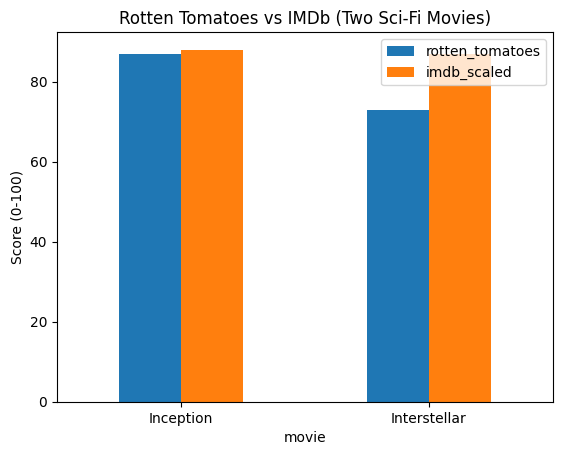

In [31]:
df.set_index("movie")[["rotten_tomatoes", "imdb_scaled"]].plot(kind="bar")
plt.title("Rotten Tomatoes vs IMDb (Two Sci-Fi Movies)")
plt.ylabel("Score (0-100)")
plt.xticks(rotation=0)
plt.show()

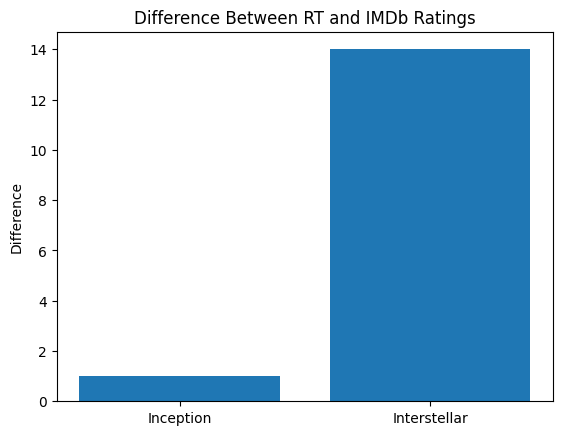

In [32]:
plt.bar(df["movie"], df["rating_difference"])
plt.title("Difference Between RT and IMDb Ratings")
plt.ylabel("Difference")
plt.show()